In [62]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna
from scipy.interpolate import RegularGridInterpolator

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [63]:
# Inputs 
z_cb_lst = np.hstack((np.linspace(25, 250, 10), np.linspace(300, 750, 10)))

TS_cb_lst = dict()
TS_cb_lst['stca']= dict()
TS_cb_lst['stca']['V2'] = np.linspace(0.75, 1.0, 11)
TS_cb_lst['stca']['Vmax'] = np.linspace(0.4, 1.0, 25)
TS_cb_lst['a10'] = dict()
TS_cb_lst['a10']['V2'] = np.linspace(0.775, 1.0, 10)
TS_cb_lst['a10']['Vmax'] = np.linspace(0.675, 1.0, 14)

Vmax_lst = dict()
Vmax_lst['stca'] = dict()
Vmax_lst['stca']['V2'] = 197*0.51444444
Vmax_lst['stca']['Vmax'] = 250*0.51444444
Vmax_lst['a10'] = dict()
Vmax_lst['a10']['V2'] = 234.4*0.51444444
Vmax_lst['a10']['Vmax'] = 250*0.51444444

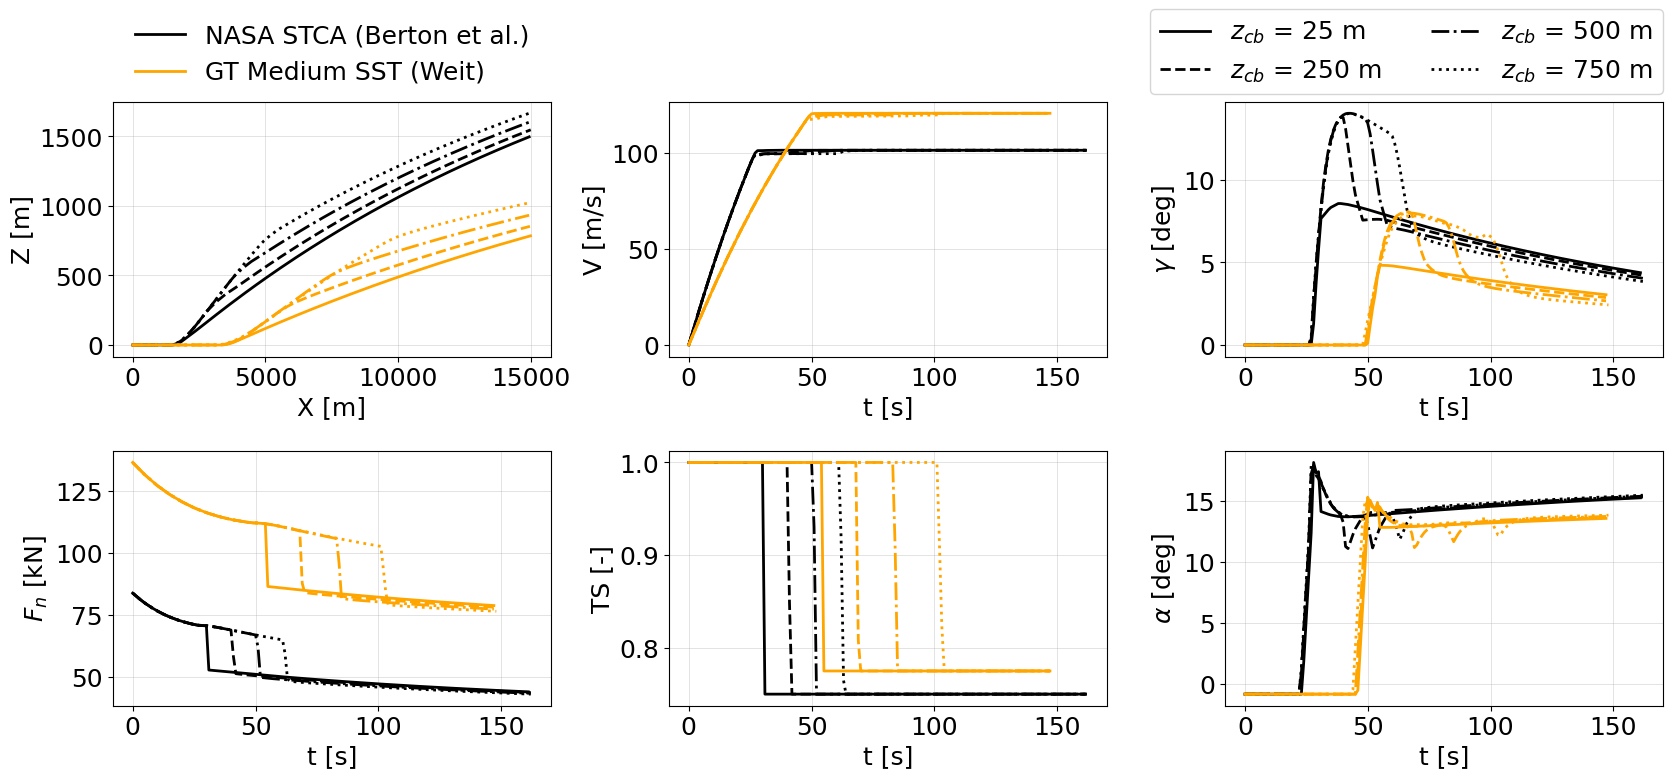

In [79]:
# Plot trajectories 
fig, ax = plt.subplots(2, 3, figsize=(20,8))
plt.style.use('../utils/plot.mplstyle')

for ac_name in ['stca', 'a10']:

    case = 'V2'

    pyna_settings = pyna.load_settings(case_name=ac_name)
    pyna_settings.ac_name = ac_name

    for i, z_cb in enumerate([25., 250., 500., 750.]):
        for j,TS in enumerate([TS_cb_lst[ac_name][case][0]]):

            if ac_name == 'stca':
                rnd = 2
                color = 'k'
                label='NASA STCA (Berton et al.)'
            elif ac_name == 'a10':
                rnd = 3
                color='orange'
                label='GT Medium SST (Weit)'
            
            pyna_settings.output_file_name = pyna_settings.ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.sql'
            pyna_settings.engine_file_name = 'engine_' + pyna_settings.ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.csv'
            pyna_settings.trajectory_file_name = 'trajectory_' + pyna_settings.ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.csv'

            data = pd.read_csv('../cases/'+ac_name+'/trajectory/STCB/'+case+'/'+pyna_settings.trajectory_file_name)
            
            if z_cb == 25:
                linestyle = '-'
                label_v = '$z_{cb}$ = 25 m'
            if z_cb == 250:
                linestyle = '--'
                label_v = '$z_{cb}$ = 250 m'
            if z_cb == 500:
                linestyle = '-.'
                label_v = '$z_{cb}$ = 500 m'
            if z_cb == 750:
                linestyle = ':'
                label_v = '$z_{cb}$ = 750 m'
            
            if z_cb == 25.:
                ax[0, 0].plot(data['X [m]'], data['Z [m]'], linestyle=linestyle, color=color, label=label)
            else:
                ax[0, 0].plot(data['X [m]'], data['Z [m]'], linestyle=linestyle, color=color)

            if ac_name == 'stca':
                ax[0, 1].plot(data['t_source [s]'], data['V [m/s]'], linestyle, color=color, label=label_v)
            else:
                ax[0, 1].plot(data['t_source [s]'], data['V [m/s]'], linestyle, color=color)
            ax[0, 2].plot(data['t_source [s]'], data['gamma [deg]'], linestyle, color=color)
            ax[1, 0].plot(data['t_source [s]'], data['F_n [N]']/1000., linestyle, color=color)
            ax[1, 1].plot(data['t_source [s]'], data['TS [-]'], linestyle, color=color)
            ax[1, 2].plot(data['t_source [s]'], data['alpha [deg]'], linestyle, color=color)

#             print(data['F_n [N]'][0])

ax[0, 0].set_xlabel('X [m]')
ax[0, 1].set_xlabel('t [s]')
ax[0, 2].set_xlabel('t [s]')
ax[1, 0].set_xlabel('t [s]')
ax[1, 1].set_xlabel('t [s]')
ax[1, 2].set_xlabel('t [s]')

ax[0, 0].set_ylabel('Z [m]')
ax[0, 1].set_ylabel('V [m/s]')
ax[0, 2].set_ylabel(r'$\gamma$ [deg]')
ax[1, 0].set_ylabel(r'$F_n$ [kN]')
ax[1, 1].set_ylabel('TS [-]')
ax[1, 2].set_ylabel(r'$\alpha$ [deg]')

ax[0,0].legend(loc='lower left', bbox_to_anchor=(0, 0.98), ncol=1, frameon=False)
ax[0,1].legend(loc='lower left', bbox_to_anchor=(1.07, 0.98), ncol=2, frameon=True)
plt.subplots_adjust(hspace=0.37, wspace=0.27)


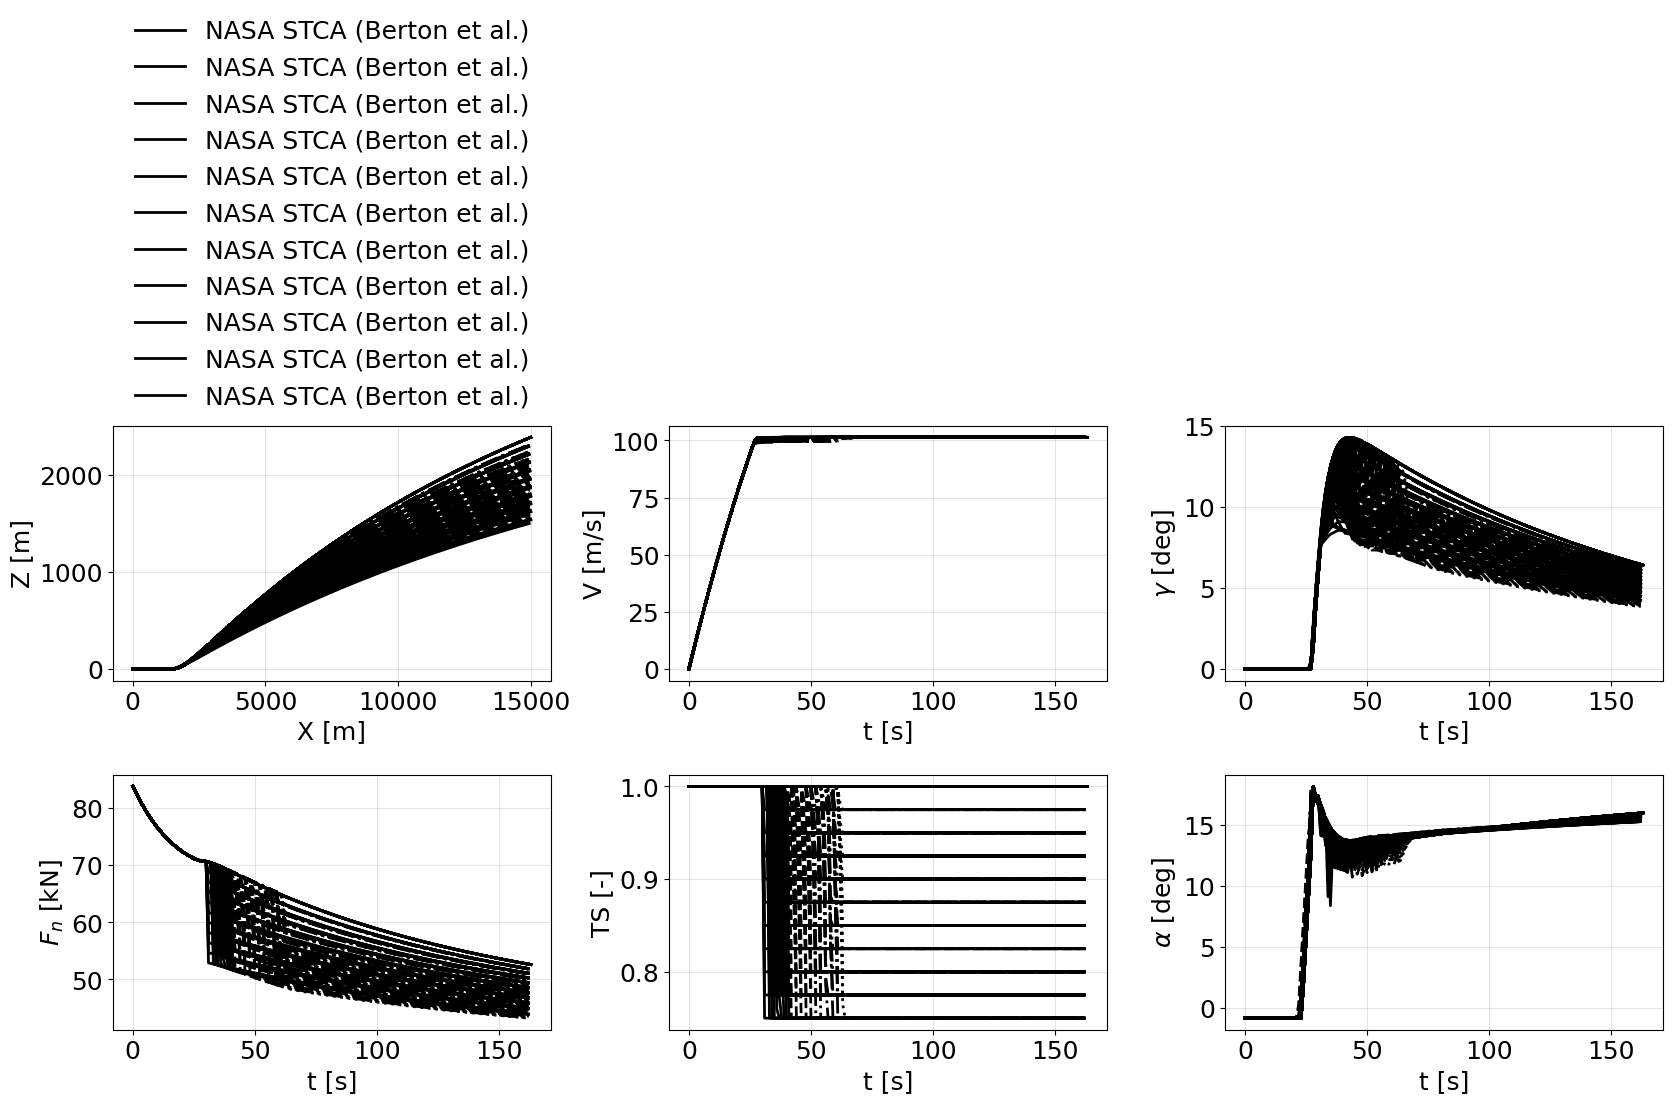

In [87]:
# Plot trajectories 
fig, ax = plt.subplots(2, 3, figsize=(20,8))
plt.style.use('../utils/plot.mplstyle')

ac_name = 'stca'

case = 'V2'

pyna_settings = pyna.load_settings(case_name=ac_name)
pyna_settings.ac_name = ac_name

# for i, z_cb in enumerate([25., 250., 500., 750.]):
for i, z_cb in enumerate(z_cb_lst):
    for j,TS in enumerate(TS_cb_lst[ac_name][case]):

        if ac_name == 'stca':
            color = 'k'
            label='NASA STCA (Berton et al.)'
        elif ac_name == 'a10':
            color='orange'
            label='GT Medium SST (Weit)'

        pyna_settings.output_file_name = pyna_settings.ac_name + '_' + str(np.round(z_cb, 3)) + '_' + str(np.round(TS, 3)) + '.sql'
        pyna_settings.engine_file_name = 'engine_' + pyna_settings.ac_name + '_' + str(np.round(z_cb, 3)) + '_' + str(np.round(TS, 3)) + '.csv'
        pyna_settings.trajectory_file_name = 'trajectory_' + pyna_settings.ac_name + '_' + str(np.round(z_cb, 3)) + '_' + str(np.round(TS, 3)) + '.csv'

        data = pd.read_csv('../cases/'+ac_name+'/trajectory/STCB/'+case+'/'+pyna_settings.trajectory_file_name)

        if z_cb == 25:
            linestyle = '-'
            label_v = '$z_{cb}$ = 25 m'
        if z_cb == 250:
            linestyle = '--'
            label_v = '$z_{cb}$ = 250 m'
        if z_cb == 500:
            linestyle = '-.'
            label_v = '$z_{cb}$ = 500 m'
        if z_cb == 750:
            linestyle = ':'
            label_v = '$z_{cb}$ = 750 m'

        if z_cb == 25.:
            ax[0, 0].plot(data['X [m]'], data['Z [m]'], linestyle=linestyle, color=color, label=label)
        else:
            ax[0, 0].plot(data['X [m]'], data['Z [m]'], linestyle=linestyle, color=color)

        if ac_name == 'stca':
            ax[0, 1].plot(data['t_source [s]'], data['V [m/s]'], linestyle, color=color, label=label_v)
        else:
            ax[0, 1].plot(data['t_source [s]'], data['V [m/s]'], linestyle, color=color)
        ax[0, 2].plot(data['t_source [s]'], data['gamma [deg]'], linestyle, color=color)
        ax[1, 0].plot(data['t_source [s]'], data['F_n [N]']/1000., linestyle, color=color)
        ax[1, 1].plot(data['t_source [s]'], data['TS [-]'], linestyle, color=color)
        ax[1, 2].plot(data['t_source [s]'], data['alpha [deg]'], linestyle, color=color)

#             print(data['F_n [N]'][0])

ax[0, 0].set_xlabel('X [m]')
ax[0, 1].set_xlabel('t [s]')
ax[0, 2].set_xlabel('t [s]')
ax[1, 0].set_xlabel('t [s]')
ax[1, 1].set_xlabel('t [s]')
ax[1, 2].set_xlabel('t [s]')

ax[0, 0].set_ylabel('Z [m]')
ax[0, 1].set_ylabel('V [m/s]')
ax[0, 2].set_ylabel(r'$\gamma$ [deg]')
ax[1, 0].set_ylabel(r'$F_n$ [kN]')
ax[1, 1].set_ylabel('TS [-]')
ax[1, 2].set_ylabel(r'$\alpha$ [deg]')

ax[0,0].legend(loc='lower left', bbox_to_anchor=(0, 0.98), ncol=1, frameon=False)
# ax[0,1].legend(loc='lower left', bbox_to_anchor=(1.07, 0.98), ncol=2, frameon=True)
plt.subplots_adjust(hspace=0.37, wspace=0.27)


In [105]:
# Compute noise time series
if True:
    
    k_rot_lst = dict()
    LD_climbout = dict()
    
    for ac_name in ['stca', 'a10']:

        k_rot_lst[ac_name] = dict()
        LD_climbout[ac_name] = dict()
        
        for case in ['V2', 'Vmax']:
            
            k_rot_lst[ac_name][case] = np.zeros((np.size(z_cb_lst), np.size(TS_cb_lst[ac_name][case])))
            LD_climbout[ac_name][case] = np.zeros((np.size(z_cb_lst), np.size(TS_cb_lst[ac_name][case])))
            
            pyna_settings = pyna.load_settings(case_name=ac_name)
            pyna_settings.output_directory_name = 'STCB/' + case
            
            for j,TS in enumerate(TS_cb_lst[ac_name][case]):
                for i, z_cb in enumerate(z_cb_lst):

                    pyna_settings.ac_name = ac_name
                    pyna_settings.output_file_name = pyna_settings.ac_name + '_' + str(np.round(z_cb, 3)) + '_' + str(np.round(TS, 3)) + '.sql'
                    
                    print(ac_name, " ", case, " - TS: ", TS, "; z_cb: ", z_cb)

                    py = pyna(pyna_settings)
                    results = py.load_results(pyna_settings.output_file_name)
                    
                    k_rot_lst[ac_name][case][i,j] = results.get_val('phases.groundroll.parameters:k_rot')
                    LD_climbout[ac_name][case][i,j] = np.mean(results.get_val('phases.cutback.interpolated.c_l')/results.get_val('phases.cutback.interpolated.c_d'))
                    
            np.save('../cases/'+ac_name+'/output/STCB/'+case+'/sweeps/k_rot.npy', k_rot_lst[ac_name][case])
            np.save('../cases/'+ac_name+'/output/STCB/'+case+'/sweeps/LD_climbout.npy', LD_climbout[ac_name][case])

            clear_output()

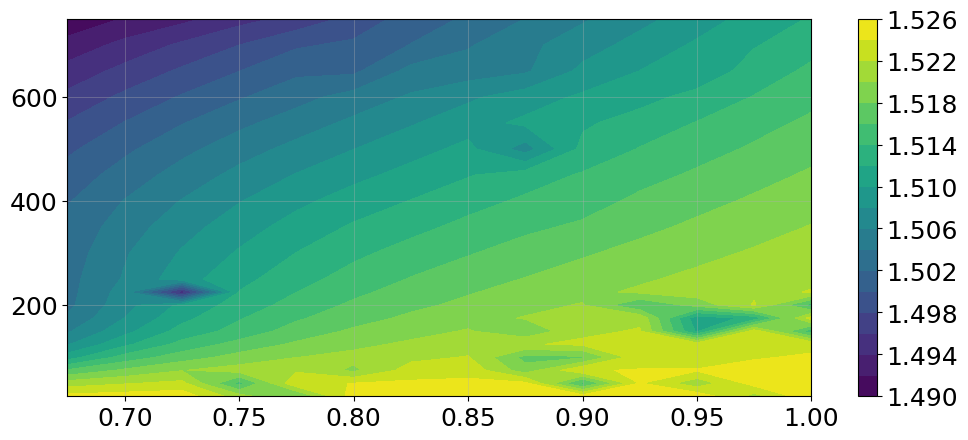

In [141]:
ac_name = 'a10'
case = 'Vmax'
k_rot = np.load('../cases/'+ac_name+'/output/STCB/'+case+'/sweeps/k_rot.npy')

plt.contourf(TS_cb_lst[ac_name][case], z_cb_lst,k_rot, levels=20)
plt.colorbar()

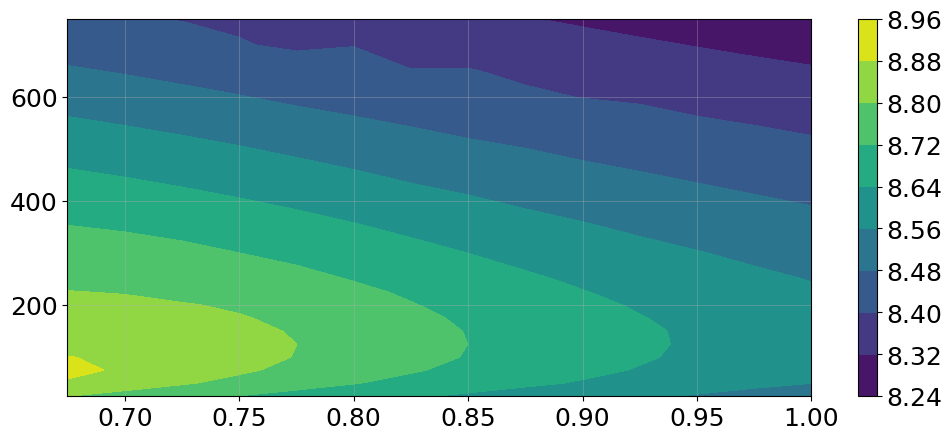

In [125]:
ac_name = 'a10'
case = 'Vmax'
k_rot = np.load('../cases/'+ac_name+'/output/STCB/'+case+'/sweeps/LD_climbout.npy')

plt.contourf(TS_cb_lst[ac_name][case], z_cb_lst,k_rot)
plt.colorbar()

In [134]:
z_cb = 100.
TS = 1.0
ac_name = 'stca'

pyna_settings.case_name = ac_name
pyna_settings.ac_name = ac_name
pyna_settings.output_file_name = pyna_settings.ac_name + '_' + str(np.round(z_cb, 3)) + '_' + str(np.round(TS, 3)) + '.sql'

print(ac_name, " ", case, " - TS: ", TS, "; z_cb: ", z_cb)

py = pyna(pyna_settings)
results = py.load_results(pyna_settings.output_file_name)

stca   Vmax  - TS:  1.0 ; z_cb:  100.0


In [136]:
results.get_val('phases.groundroll.parameters:k_rot')

array([1.59999878])

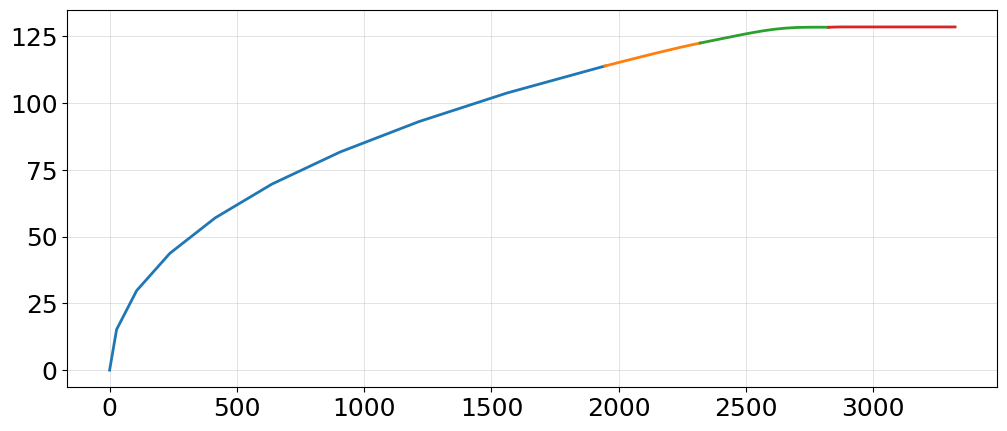

In [140]:
plt.plot(results.get_val('phases.groundroll.interpolated.states:x'), results.get_val('phases.groundroll.interpolated.states:v'))
plt.plot(results.get_val('phases.rotation.interpolated.states:x'), results.get_val('phases.rotation.interpolated.states:v'))
plt.plot(results.get_val('phases.liftoff.interpolated.states:x'), results.get_val('phases.liftoff.interpolated.states:v'))
plt.plot(results.get_val('phases.vnrs.interpolated.states:x'), results.get_val('phases.vnrs.interpolated.states:v'))